### Population dynamics

Three models that describe population dynamics are
$$
\frac{d y}{d t}=r\left(1-\frac{y}{K}\right) y
$$

where $r$ is the population growth and $K$ the limit size of the population.

The second
$$
\frac{d y}{d t}=-r\left(1-\frac{y}{T}\right) y
$$

where $T$ is a threshold level, below which growth does not occur.

And the last one is

$$
\frac{d y}{d t}=-r\left(1-\frac{y}{T}\right)\left(1-\frac{y}{K}\right) y
$$



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


class Logistic:
    """This class defines the Logistic population
    growth of a population which has a limited size K
    and a growth rate of r.

    Attributes:
        r    Growth rate of the population
        K     Limit sizeof the population
    """
    def __init__(self,r,K):
        self.r = r
        self.K = K

    def __call__(self,x,t):
        return self.r*(1-x/self.K)*x
    

class LogisticThres:
    """This class defines the Logistic population
    growth of a population which has a limited size K
    and a growth rate of r.

    Attributes:
        r    Growth rate of the population
        T     Threshold for wrowth to start
    """
    def __init__(self,r,T):
        self.r = r
        self.T = T

    def __call__(self,x,t):
        return - self.r*(1-x/self.T)*x
    
class LogisticThresFix:
    """This class defines the Logistic population
    growth of a population which has a limited size K
    and a growth rate of r.

    Attributes:
        r    Growth rate of the population
        T     Threshold for wrowth to start
    """
    def __init__(self,r,T,K):
        self.r = r
        self.T = T
        self.K = K

    def __call__(self,x,t):
        return - self.r*(1-x/self.T)*(1-x/self.K)*x

class ExplicitEuler:
    """This class defines the Explicit Euler 
    scheme for the numerical resolution of 
    a differentiel equation.
    """
    def __init__(self,f):
        self.f = f

    def iterate(self,x0,t,dt):
        return x0+dt*self.f(x0,t)


class Integrator:
    """This class defines the Integration  
    of a differential equation between tMin and tMax
    with N discretization steps and x0 as an initial condition
    """
    def __init__(self,method,x0,tMin,tMax,N):
        self.x0   = x0
        self.tMin = tMin
        self.tMax = tMax
        self.dt   = (tMax - tMin)/(N-1)

        self.f = method

    def getIntegrationTime(self):
        return np.arange(self.tMin,self.tMax+self.dt,self.dt)
        

    def integrate(self):
        x = np.array([self.x0])
        for t in np.arange(self.tMin,self.tMax,self.dt):
            x = np.append( x, [self.f.iterate(x[-1],t,self.dt)],axis=0)
        return x


#### Logistic growth

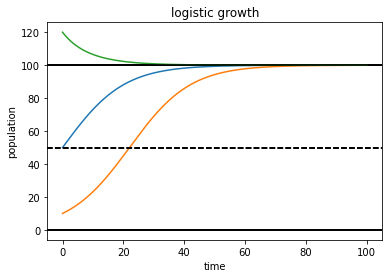

In [2]:
K=100
r=0.1
x0 = [K/2,K/10,1.2*K]
for i in range(len(x0)):

    eul = Integrator(ExplicitEuler(Logistic(r=r, K=K)),x0[i],0,100,2000)
    dynamics = eul.integrate()

    plt.plot(eul.getIntegrationTime(),
             dynamics)
    plt.ylabel("population")
    plt.xlabel("time")
    plt.axhline(K, color='black')
    plt.axhline(K/2, color='black', linestyle='--')
    plt.axhline(0, color='black')
    plt.title('logistic growth')

plt.show()

#### Logistic growth with threshold

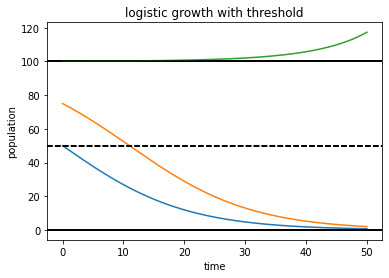

In [4]:
T=100
r=0.1
x0 = [T/2,3*T/4,T+0.1]
for i in range(len(x0)):

    eul = Integrator(ExplicitEuler(LogisticThres(r=r, T=T)),x0[i],0,50,2000)
    dynamics = eul.integrate()

    plt.plot(eul.getIntegrationTime(),
             dynamics)
    plt.ylabel("population")
    plt.xlabel("time")
    plt.axhline(T, color='black')
    plt.axhline(T/2, color='black', linestyle='--')
    plt.axhline(0, color='black')
    plt.title('logistic growth with threshold')

plt.show()

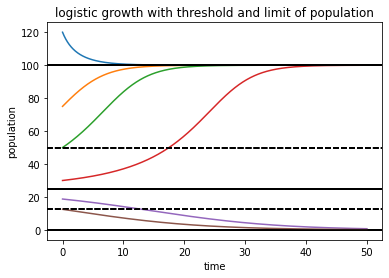

In [5]:
T=25
K = 100
r=0.1
x0 = [1.2*K,3*K/4,K/2, 1.2*T , 3*T/4, T/2]
for i in range(len(x0)):

    eul = Integrator(ExplicitEuler(LogisticThresFix(r=r, T=T,K=K)),
                     x0[i],0,50,2000)
    dynamics = eul.integrate()

    plt.plot(eul.getIntegrationTime(),
             dynamics)
    plt.ylabel("population")
    plt.xlabel("time")
    plt.axhline(K, color='black')
    plt.axhline(K/2, color='black', linestyle='--')

    plt.axhline(T, color='black')
    plt.axhline(T/2, color='black', linestyle='--')
    plt.axhline(0, color='black')
    plt.title('logistic growth with threshold and limit of population')

plt.show()